In [12]:
# Nonlinear Schrödinger equation
# You need to have tensorflow, keras, and sciann installed in your system. 
# On google colab, uncomment next line to install sciann. 
# !pip install sciann 

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
import sciann as sn 

In [14]:
x = sn.Variable('x')
t = sn.Variable('t')
psi_r = sn.Functional('psi_r', [t,x], 5*[50], 'tanh')
psi_i = sn.Functional('psi_i', [t,x], 5*[50], 'tanh')

In [15]:
from numpy import pi
from sciann.utils.math import diff,sign,sqrt,cosh
kappa = -1

In [16]:
L1_r = -diff(psi_i,t)+0.5*diff(psi_r,x,order=2)-kappa*(psi_r**2+psi_i**2)*psi_r
L1_i = diff(psi_r,t)+0.5*diff(psi_i,x,order=2)-kappa*(psi_r**2+psi_i**2)*psi_i

In [17]:
TOL = 0.001
C1_r = (1-sign(t - TOL)) * (psi_i - 1.0/cosh(x))
C1_i = (1-sign(t - TOL)) *  (psi_i - 1.0/cosh(x))
C2_r = (1-sign(x - (-5+TOL))) * psi_r - (1+sign(x - (5-TOL))) * psi_r
C2_i = (1-sign(x - (-5+TOL))) * psi_i - (1+sign(x - (5-TOL))) * psi_i
C3_r = (1-sign(x - (-5+TOL))) * diff(psi_r,x) - (1+sign(x - (5-TOL))) * diff(psi_r,x)
C3_i = (1-sign(x - (-5+TOL))) * diff(psi_i,x) - (1+sign(x - (5-TOL))) * diff(psi_i,x)

In [18]:
model = sn.SciModel([x, t], [L1_r, L1_i, C1_r, C1_i, C2_r, C2_i, C3_r, C3_i])

In [19]:
x_data, t_data = np.meshgrid(
    np.linspace(-5.0, 5.0, 100), 
    np.linspace(0.0, pi/2, 100)
)

In [20]:
h = model.train([x_data, t_data], 8*['zero'], learning_rate=0.002, epochs=1000, verbose=1)


Total samples: 10000 
Batch size: 64 
Total batches: 157 

Epoch 1/1000
157/157 [==============================] - 4s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0198 - sub_19_loss: 0.0053 - sub_20_loss: 0.0072 - mul_25_loss: 0.0024 - mul_26_loss: 0.0024 - sub_27_loss: 0.0011 - sub_30_loss: 0.0014 - sub_33_loss: 9.4051e-06 - sub_36_loss: 1.3104e-05 - lr: 0.0020 - time: 4.3573
Epoch 2/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0021 - sub_19_loss: 6.6689e-04 - sub_20_loss: 5.4989e-04 - mul_25_loss: 3.4118e-04 - mul_26_loss: 3.4118e-04 - sub_27_loss: 4.1096e-05 - sub_30_loss: 1.1637e-04 - sub_33_loss: 6.6074e-06 - sub_36_loss: 2.0793e-05 - lr: 0.0020 - time: 0.9966
Epoch 3/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.1564e-04 - sub_19_loss: 3.0037e-04 - sub_20_loss: 2.9336e-04 - mul_25_loss: 1.1468e-04 - mul_26_loss: 1.1468e-04 - sub_27_loss: 3.5296e-05 - sub_30_l

Epoch 24/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 0.0012 - sub_19_loss: 1.9246e-04 - sub_20_loss: 4.5258e-04 - mul_25_loss: 1.6284e-04 - mul_26_loss: 1.6284e-04 - sub_27_loss: 4.5703e-05 - sub_30_loss: 1.5349e-04 - sub_33_loss: 4.6228e-06 - sub_36_loss: 1.3927e-05 - lr: 0.0020 - time: 0.9091
Epoch 25/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 4.0692e-04 - sub_19_loss: 6.5482e-05 - sub_20_loss: 1.6827e-04 - mul_25_loss: 6.0646e-05 - mul_26_loss: 6.0646e-05 - sub_27_loss: 1.5003e-05 - sub_30_loss: 1.8206e-05 - sub_33_loss: 4.9175e-06 - sub_36_loss: 1.3756e-05 - lr: 0.0020 - time: 0.9036
Epoch 26/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 2.9060e-04 - sub_19_loss: 4.8779e-05 - sub_20_loss: 1.2451e-04 - mul_25_loss: 2.6315e-05 - mul_26_loss: 2.6315e-05 - sub_27_loss: 1.9863e-05 - sub_30_loss: 2.7753e-05 - sub_33_loss

Epoch 47/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 4.8731e-04 - sub_19_loss: 8.1197e-05 - sub_20_loss: 1.8246e-04 - mul_25_loss: 6.6598e-05 - mul_26_loss: 6.6598e-05 - sub_27_loss: 2.9121e-05 - sub_30_loss: 4.5140e-05 - sub_33_loss: 4.2366e-06 - sub_36_loss: 1.1944e-05 - lr: 0.0020 - time: 0.8866
Epoch 48/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 2.3778e-04 - sub_19_loss: 4.5589e-05 - sub_20_loss: 1.0554e-04 - mul_25_loss: 2.6152e-05 - mul_26_loss: 2.6152e-05 - sub_27_loss: 9.4398e-06 - sub_30_loss: 1.1077e-05 - sub_33_loss: 3.7192e-06 - sub_36_loss: 1.0110e-05 - lr: 0.0020 - time: 0.8796
Epoch 49/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 3.8405e-04 - sub_19_loss: 5.2949e-05 - sub_20_loss: 2.1694e-04 - mul_25_loss: 3.3903e-05 - mul_26_loss: 3.3903e-05 - sub_27_loss: 1.3352e-05 - sub_30_loss: 1.9055e-05 - sub_33_

Epoch 70/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 2.1183e-04 - sub_19_loss: 3.4059e-05 - sub_20_loss: 1.0312e-04 - mul_25_loss: 1.6093e-05 - mul_26_loss: 1.6093e-05 - sub_27_loss: 2.0560e-05 - sub_30_loss: 9.4188e-06 - sub_33_loss: 3.3605e-06 - sub_36_loss: 9.1297e-06 - lr: 0.0020 - time: 0.8207
Epoch 71/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.5417e-04 - sub_19_loss: 2.8214e-05 - sub_20_loss: 7.7342e-05 - mul_25_loss: 1.3044e-05 - mul_26_loss: 1.3044e-05 - sub_27_loss: 4.4063e-06 - sub_30_loss: 7.0123e-06 - sub_33_loss: 2.9889e-06 - sub_36_loss: 8.1171e-06 - lr: 0.0020 - time: 0.8740
Epoch 72/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 2.9243e-04 - sub_19_loss: 6.2335e-05 - sub_20_loss: 1.2886e-04 - mul_25_loss: 2.9246e-05 - mul_26_loss: 2.9246e-05 - sub_27_loss: 1.5313e-05 - sub_30_loss: 1.6660e-05 - sub_33_

Epoch 93/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.6871e-04 - sub_19_loss: 2.2578e-05 - sub_20_loss: 6.6048e-05 - mul_25_loss: 2.1901e-05 - mul_26_loss: 2.1901e-05 - sub_27_loss: 1.8935e-05 - sub_30_loss: 7.2578e-06 - sub_33_loss: 2.8262e-06 - sub_36_loss: 7.2589e-06 - lr: 0.0020 - time: 1.0017
Epoch 94/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.8074e-05 - sub_19_loss: 1.6629e-05 - sub_20_loss: 4.5054e-05 - mul_25_loss: 8.6103e-06 - mul_26_loss: 8.6103e-06 - sub_27_loss: 4.7834e-06 - sub_30_loss: 5.4341e-06 - sub_33_loss: 2.7473e-06 - sub_36_loss: 6.2042e-06 - lr: 0.0020 - time: 1.0266
Epoch 95/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.9961e-04 - sub_19_loss: 2.8737e-05 - sub_20_loss: 8.4494e-05 - mul_25_loss: 1.6829e-05 - mul_26_loss: 1.6829e-05 - sub_27_loss: 3.1995e-05 - sub_30_loss: 1.1149e-05 - sub_33_

157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.8680e-05 - sub_19_loss: 1.5311e-05 - sub_20_loss: 3.6751e-05 - mul_25_loss: 8.3122e-06 - mul_26_loss: 8.3122e-06 - sub_27_loss: 7.2444e-06 - sub_30_loss: 6.0051e-06 - sub_33_loss: 2.3796e-06 - sub_36_loss: 4.3647e-06 - lr: 0.0020 - time: 0.9449
Epoch 116/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.6929e-05 - sub_19_loss: 1.7194e-05 - sub_20_loss: 4.2932e-05 - mul_25_loss: 5.2898e-06 - mul_26_loss: 5.2898e-06 - sub_27_loss: 6.1003e-06 - sub_30_loss: 3.8962e-06 - sub_33_loss: 1.9148e-06 - sub_36_loss: 4.3148e-06 - lr: 0.0020 - time: 1.0499
Epoch 117/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.8350e-05 - sub_19_loss: 1.7961e-05 - sub_20_loss: 3.8456e-05 - mul_25_loss: 6.7188e-06 - mul_26_loss: 6.7188e-06 - sub_27_loss: 6.8292e-06 - sub_30_loss: 5.4803e-06 - sub_33_loss: 1.9775

Epoch 138/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.2697e-04 - sub_19_loss: 1.9347e-05 - sub_20_loss: 7.3608e-05 - mul_25_loss: 8.0564e-06 - mul_26_loss: 8.0564e-06 - sub_27_loss: 7.0726e-06 - sub_30_loss: 5.0202e-06 - sub_33_loss: 2.3796e-06 - sub_36_loss: 3.4293e-06 - lr: 0.0020 - time: 0.9475
Epoch 139/1000
157/157 [==============================] - 1s 7ms/step - batch: 78.0000 - size: 63.6943 - loss: 5.2531e-05 - sub_19_loss: 7.8044e-06 - sub_20_loss: 2.5623e-05 - mul_25_loss: 4.3834e-06 - mul_26_loss: 4.3834e-06 - sub_27_loss: 3.0783e-06 - sub_30_loss: 2.6629e-06 - sub_33_loss: 1.5344e-06 - sub_36_loss: 3.0600e-06 - lr: 0.0020 - time: 1.0631
Epoch 140/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 6.3604e-05 - sub_19_loss: 1.1712e-05 - sub_20_loss: 3.1498e-05 - mul_25_loss: 3.9096e-06 - mul_26_loss: 3.9096e-06 - sub_27_loss: 4.8969e-06 - sub_30_loss: 3.5572e-06 - sub_

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 7.5078e-05 - sub_19_loss: 1.2584e-05 - sub_20_loss: 3.8353e-05 - mul_25_loss: 5.9469e-06 - mul_26_loss: 5.9469e-06 - sub_27_loss: 4.6692e-06 - sub_30_loss: 3.5174e-06 - sub_33_loss: 1.5812e-06 - sub_36_loss: 2.4795e-06 - lr: 0.0020 - time: 0.8560
Epoch 161/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 7.1844e-05 - sub_19_loss: 1.3801e-05 - sub_20_loss: 3.3867e-05 - mul_25_loss: 5.6025e-06 - mul_26_loss: 5.6025e-06 - sub_27_loss: 4.4490e-06 - sub_30_loss: 4.4316e-06 - sub_33_loss: 1.8535e-06 - sub_36_loss: 2.2365e-06 - lr: 0.0020 - time: 0.8325
Epoch 162/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.3882e-04 - sub_19_loss: 2.3167e-05 - sub_20_loss: 7.5089e-05 - mul_25_loss: 9.4914e-06 - mul_26_loss: 9.4914e-06 - sub_27_loss: 1.0152e-05 - sub_30_loss: 6.2618e-06 - sub_33_loss: 1.7048

Epoch 183/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.2972e-05 - sub_19_loss: 1.5430e-05 - sub_20_loss: 3.9728e-05 - mul_25_loss: 9.9142e-06 - mul_26_loss: 9.9142e-06 - sub_27_loss: 8.5986e-06 - sub_30_loss: 4.7178e-06 - sub_33_loss: 2.2900e-06 - sub_36_loss: 2.3788e-06 - lr: 0.0020 - time: 0.8180
Epoch 184/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.2713e-05 - sub_19_loss: 1.7874e-05 - sub_20_loss: 3.4984e-05 - mul_25_loss: 5.7440e-06 - mul_26_loss: 5.7440e-06 - sub_27_loss: 9.4199e-06 - sub_30_loss: 4.1602e-06 - sub_33_loss: 1.9784e-06 - sub_36_loss: 2.8069e-06 - lr: 0.0020 - time: 0.8291
Epoch 185/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 6.4171e-05 - sub_19_loss: 1.0223e-05 - sub_20_loss: 3.2920e-05 - mul_25_loss: 4.3536e-06 - mul_26_loss: 4.3536e-06 - sub_27_loss: 4.8688e-06 - sub_30_loss: 3.5237e-06 - sub_

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.9017e-04 - sub_19_loss: 3.9750e-05 - sub_20_loss: 1.0336e-04 - mul_25_loss: 1.1996e-05 - mul_26_loss: 1.1996e-05 - sub_27_loss: 1.3793e-05 - sub_30_loss: 4.1145e-06 - sub_33_loss: 2.5854e-06 - sub_36_loss: 2.5693e-06 - lr: 0.0020 - time: 0.8312
Epoch 206/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.1773e-04 - sub_19_loss: 1.8096e-05 - sub_20_loss: 5.1281e-05 - mul_25_loss: 1.4254e-05 - mul_26_loss: 1.4254e-05 - sub_27_loss: 1.0808e-05 - sub_30_loss: 3.8792e-06 - sub_33_loss: 3.0496e-06 - sub_36_loss: 2.1180e-06 - lr: 0.0020 - time: 0.8108
Epoch 207/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.0577e-04 - sub_19_loss: 1.7896e-05 - sub_20_loss: 5.0676e-05 - mul_25_loss: 7.5145e-06 - mul_26_loss: 7.5145e-06 - sub_27_loss: 1.3089e-05 - sub_30_loss: 4.2478e-06 - sub_33_loss: 2.6897

Epoch 228/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.9130e-04 - sub_19_loss: 2.7591e-05 - sub_20_loss: 1.0496e-04 - mul_25_loss: 1.8973e-05 - mul_26_loss: 1.8973e-05 - sub_27_loss: 1.0671e-05 - sub_30_loss: 5.0869e-06 - sub_33_loss: 2.7578e-06 - sub_36_loss: 2.2900e-06 - lr: 0.0020 - time: 0.8124
Epoch 229/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.0645e-05 - sub_19_loss: 1.5355e-05 - sub_20_loss: 5.1592e-05 - mul_25_loss: 5.0224e-06 - mul_26_loss: 5.0224e-06 - sub_27_loss: 6.0180e-06 - sub_30_loss: 3.7167e-06 - sub_33_loss: 2.0532e-06 - sub_36_loss: 1.8648e-06 - lr: 0.0020 - time: 0.8276
Epoch 230/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.2557e-04 - sub_19_loss: 1.6203e-05 - sub_20_loss: 7.3472e-05 - mul_25_loss: 1.0593e-05 - mul_26_loss: 1.0593e-05 - sub_27_loss: 6.4969e-06 - sub_30_loss: 4.2576e-06 - sub_

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.4313e-04 - sub_19_loss: 2.7919e-05 - sub_20_loss: 6.1372e-05 - mul_25_loss: 7.8306e-06 - mul_26_loss: 7.8306e-06 - sub_27_loss: 2.8641e-05 - sub_30_loss: 3.9405e-06 - sub_33_loss: 3.8464e-06 - sub_36_loss: 1.7502e-06 - lr: 0.0020 - time: 0.7894
Epoch 251/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 2.4563e-04 - sub_19_loss: 4.7810e-05 - sub_20_loss: 1.2229e-04 - mul_25_loss: 1.9589e-05 - mul_26_loss: 1.9589e-05 - sub_27_loss: 2.4465e-05 - sub_30_loss: 5.4751e-06 - sub_33_loss: 3.4806e-06 - sub_36_loss: 2.9376e-06 - lr: 0.0020 - time: 0.8243
Epoch 252/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 4.9636e-05 - sub_19_loss: 7.1583e-06 - sub_20_loss: 2.2654e-05 - mul_25_loss: 4.7533e-06 - mul_26_loss: 4.7533e-06 - sub_27_loss: 4.1264e-06 - sub_30_loss: 2.7287e-06 - sub_33_loss: 1.6411

Epoch 273/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 5.7691e-05 - sub_19_loss: 7.4628e-06 - sub_20_loss: 3.2860e-05 - mul_25_loss: 3.2241e-06 - mul_26_loss: 3.2241e-06 - sub_27_loss: 4.4565e-06 - sub_30_loss: 3.4590e-06 - sub_33_loss: 1.4316e-06 - sub_36_loss: 1.5721e-06 - lr: 0.0020 - time: 0.7948
Epoch 274/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.9318e-04 - sub_19_loss: 2.6653e-05 - sub_20_loss: 1.1548e-04 - mul_25_loss: 1.5495e-05 - mul_26_loss: 1.5495e-05 - sub_27_loss: 8.3172e-06 - sub_30_loss: 7.0763e-06 - sub_33_loss: 2.3423e-06 - sub_36_loss: 2.3079e-06 - lr: 0.0020 - time: 0.8181
Epoch 275/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 3.1611e-05 - sub_19_loss: 4.7951e-06 - sub_20_loss: 1.2992e-05 - mul_25_loss: 2.2257e-06 - mul_26_loss: 2.2257e-06 - sub_27_loss: 3.6083e-06 - sub_30_loss: 2.5456e-06 - sub_

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 5.5544e-05 - sub_19_loss: 9.0210e-06 - sub_20_loss: 2.9607e-05 - mul_25_loss: 3.5441e-06 - mul_26_loss: 3.5441e-06 - sub_27_loss: 3.9539e-06 - sub_30_loss: 3.0902e-06 - sub_33_loss: 1.4112e-06 - sub_36_loss: 1.3724e-06 - lr: 0.0020 - time: 0.8368
Epoch 296/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 2.0292e-04 - sub_19_loss: 3.0016e-05 - sub_20_loss: 1.2902e-04 - mul_25_loss: 9.6580e-06 - mul_26_loss: 9.6580e-06 - sub_27_loss: 1.5098e-05 - sub_30_loss: 4.5850e-06 - sub_33_loss: 2.8716e-06 - sub_36_loss: 2.0140e-06 - lr: 0.0020 - time: 0.7765
Epoch 297/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 4.7529e-04 - sub_19_loss: 5.6515e-05 - sub_20_loss: 2.1533e-04 - mul_25_loss: 5.0324e-05 - mul_26_loss: 5.0324e-05 - sub_27_loss: 7.8243e-05 - sub_30_loss: 1.6336e-05 - sub_33_loss: 3.9554

Epoch 318/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 2.7791e-05 - sub_19_loss: 5.0492e-06 - sub_20_loss: 1.1818e-05 - mul_25_loss: 1.2106e-06 - mul_26_loss: 1.2106e-06 - sub_27_loss: 3.2239e-06 - sub_30_loss: 2.5982e-06 - sub_33_loss: 1.4611e-06 - sub_36_loss: 1.2203e-06 - lr: 0.0020 - time: 0.8027
Epoch 319/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 6.0192e-05 - sub_19_loss: 9.4921e-06 - sub_20_loss: 3.4077e-05 - mul_25_loss: 2.9397e-06 - mul_26_loss: 2.9397e-06 - sub_27_loss: 4.8989e-06 - sub_30_loss: 2.7545e-06 - sub_33_loss: 1.4733e-06 - sub_36_loss: 1.6155e-06 - lr: 0.0020 - time: 0.8357
Epoch 320/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 5.8504e-05 - sub_19_loss: 1.1419e-05 - sub_20_loss: 2.8764e-05 - mul_25_loss: 3.5115e-06 - mul_26_loss: 3.5115e-06 - sub_27_loss: 5.2077e-06 - sub_30_loss: 2.4657e-06 - sub_

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 6.3613e-05 - sub_19_loss: 1.3216e-05 - sub_20_loss: 2.8043e-05 - mul_25_loss: 4.5829e-06 - mul_26_loss: 4.5829e-06 - sub_27_loss: 5.2143e-06 - sub_30_loss: 4.3241e-06 - sub_33_loss: 1.6979e-06 - sub_36_loss: 1.9543e-06 - lr: 0.0020 - time: 0.7986
Epoch 341/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 7.2329e-05 - sub_19_loss: 1.3486e-05 - sub_20_loss: 4.3287e-05 - mul_25_loss: 3.3567e-06 - mul_26_loss: 3.3567e-06 - sub_27_loss: 3.1063e-06 - sub_30_loss: 2.7026e-06 - sub_33_loss: 1.5650e-06 - sub_36_loss: 1.4729e-06 - lr: 0.0020 - time: 0.8223
Epoch 342/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 2.0691e-04 - sub_19_loss: 3.1373e-05 - sub_20_loss: 1.2725e-04 - mul_25_loss: 1.4787e-05 - mul_26_loss: 1.4787e-05 - sub_27_loss: 5.9542e-06 - sub_30_loss: 8.6064e-06 - sub_33_loss: 2.0521

157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.9465e-05 - sub_19_loss: 2.3419e-06 - sub_20_loss: 6.0889e-06 - mul_25_loss: 1.7247e-06 - mul_26_loss: 1.7247e-06 - sub_27_loss: 2.9525e-06 - sub_30_loss: 2.2452e-06 - sub_33_loss: 1.1335e-06 - sub_36_loss: 1.2536e-06 - lr: 0.0010 - time: 0.9928
Epoch 362/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.4534e-05 - sub_19_loss: 1.7435e-06 - sub_20_loss: 3.9931e-06 - mul_25_loss: 9.5238e-07 - mul_26_loss: 9.5238e-07 - sub_27_loss: 2.4147e-06 - sub_30_loss: 2.2379e-06 - sub_33_loss: 9.9928e-07 - sub_36_loss: 1.2420e-06 - lr: 0.0010 - time: 0.9588
Epoch 363/1000
157/157 [==============================] - 1s 7ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.3166e-05 - sub_19_loss: 1.5552e-06 - sub_20_loss: 3.5013e-06 - mul_25_loss: 7.7234e-07 - mul_26_loss: 7.7234e-07 - sub_27_loss: 2.4210e-06 - sub_30_loss: 1.9885e-06 - sub_33_loss: 9.8123

Epoch 384/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 3.9583e-05 - sub_19_loss: 7.0250e-06 - sub_20_loss: 1.9703e-05 - mul_25_loss: 1.8035e-06 - mul_26_loss: 1.8035e-06 - sub_27_loss: 4.4153e-06 - sub_30_loss: 2.4425e-06 - sub_33_loss: 1.1916e-06 - sub_36_loss: 1.1976e-06 - lr: 0.0010 - time: 0.8662
Epoch 385/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 2.8488e-05 - sub_19_loss: 5.2564e-06 - sub_20_loss: 1.2472e-05 - mul_25_loss: 1.7028e-06 - mul_26_loss: 1.7028e-06 - sub_27_loss: 3.1902e-06 - sub_30_loss: 2.0483e-06 - sub_33_loss: 1.0871e-06 - sub_36_loss: 1.0282e-06 - lr: 0.0010 - time: 1.0536
Epoch 386/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 2.0467e-05 - sub_19_loss: 2.8860e-06 - sub_20_loss: 6.2778e-06 - mul_25_loss: 1.2206e-06 - mul_26_loss: 1.2206e-06 - sub_27_loss: 3.8703e-06 - sub_30_loss: 2.6096e-06 - sub_

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.8577e-05 - sub_19_loss: 2.2348e-06 - sub_20_loss: 6.6138e-06 - mul_25_loss: 1.1105e-06 - mul_26_loss: 1.1105e-06 - sub_27_loss: 3.1117e-06 - sub_30_loss: 2.3203e-06 - sub_33_loss: 9.6223e-07 - sub_36_loss: 1.1124e-06 - lr: 0.0010 - time: 0.8666
Epoch 407/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.8249e-05 - sub_19_loss: 2.4260e-06 - sub_20_loss: 5.9763e-06 - mul_25_loss: 1.0779e-06 - mul_26_loss: 1.0779e-06 - sub_27_loss: 2.9954e-06 - sub_30_loss: 2.6651e-06 - sub_33_loss: 1.0299e-06 - sub_36_loss: 1.0006e-06 - lr: 0.0010 - time: 0.8971
Epoch 408/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 3.9552e-05 - sub_19_loss: 6.1673e-06 - sub_20_loss: 2.1315e-05 - mul_25_loss: 1.9794e-06 - mul_26_loss: 1.9794e-06 - sub_27_loss: 3.7729e-06 - sub_30_loss: 2.1533e-06 - sub_33_loss: 1.1527

Epoch 429/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 2.4931e-05 - sub_19_loss: 3.4491e-06 - sub_20_loss: 7.7041e-06 - mul_25_loss: 2.9716e-06 - mul_26_loss: 2.9716e-06 - sub_27_loss: 3.5159e-06 - sub_30_loss: 2.2733e-06 - sub_33_loss: 9.3325e-07 - sub_36_loss: 1.1124e-06 - lr: 0.0010 - time: 0.8485
Epoch 430/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 2.0656e-05 - sub_19_loss: 2.8791e-06 - sub_20_loss: 7.3264e-06 - mul_25_loss: 1.2906e-06 - mul_26_loss: 1.2906e-06 - sub_27_loss: 3.4632e-06 - sub_30_loss: 2.4477e-06 - sub_33_loss: 9.6681e-07 - sub_36_loss: 9.9277e-07 - lr: 0.0010 - time: 0.8727
Epoch 431/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.6200e-05 - sub_19_loss: 1.7121e-06 - sub_20_loss: 5.2914e-06 - mul_25_loss: 9.5452e-07 - mul_26_loss: 9.5452e-07 - sub_27_loss: 2.9765e-06 - sub_30_loss: 2.3105e-06 - sub_

157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.6533e-05 - sub_19_loss: 2.3542e-06 - sub_20_loss: 5.2496e-06 - mul_25_loss: 1.0888e-06 - mul_26_loss: 1.0888e-06 - sub_27_loss: 2.6466e-06 - sub_30_loss: 2.2729e-06 - sub_33_loss: 8.5826e-07 - sub_36_loss: 9.7307e-07 - lr: 0.0010 - time: 0.8900
Epoch 452/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 3.2311e-05 - sub_19_loss: 6.6395e-06 - sub_20_loss: 1.4192e-05 - mul_25_loss: 1.6741e-06 - mul_26_loss: 1.6741e-06 - sub_27_loss: 3.7828e-06 - sub_30_loss: 2.4543e-06 - sub_33_loss: 8.9200e-07 - sub_36_loss: 1.0028e-06 - lr: 0.0010 - time: 0.8702
Epoch 453/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 2.2838e-05 - sub_19_loss: 3.5040e-06 - sub_20_loss: 1.0058e-05 - mul_25_loss: 1.4146e-06 - mul_26_loss: 1.4146e-06 - sub_27_loss: 2.5442e-06 - sub_30_loss: 1.9982e-06 - sub_33_loss: 9.1192

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.1951e-05 - sub_19_loss: 1.3854e-06 - sub_20_loss: 2.6527e-06 - mul_25_loss: 8.1984e-07 - mul_26_loss: 8.1984e-07 - sub_27_loss: 2.5732e-06 - sub_30_loss: 2.0141e-06 - sub_33_loss: 7.7420e-07 - sub_36_loss: 9.1135e-07 - lr: 5.0000e-04 - time: 0.8268
Epoch 473/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.4355e-05 - sub_19_loss: 1.7500e-06 - sub_20_loss: 3.6283e-06 - mul_25_loss: 8.9930e-07 - mul_26_loss: 8.9930e-07 - sub_27_loss: 3.2638e-06 - sub_30_loss: 2.1061e-06 - sub_33_loss: 8.4347e-07 - sub_36_loss: 9.6424e-07 - lr: 5.0000e-04 - time: 0.8521
Epoch 474/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.3097e-05 - sub_19_loss: 1.5474e-06 - sub_20_loss: 3.5411e-06 - mul_25_loss: 8.8214e-07 - mul_26_loss: 8.8214e-07 - sub_27_loss: 2.5938e-06 - sub_30_loss: 1.9423e-06 - sub_33_loss

157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.3221e-05 - sub_19_loss: 1.4078e-06 - sub_20_loss: 4.2502e-06 - mul_25_loss: 8.3331e-07 - mul_26_loss: 8.3331e-07 - sub_27_loss: 2.4892e-06 - sub_30_loss: 1.7602e-06 - sub_33_loss: 8.1933e-07 - sub_36_loss: 8.2709e-07 - lr: 5.0000e-04 - time: 0.9311
Epoch 495/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.9161e-05 - sub_19_loss: 3.8915e-06 - sub_20_loss: 6.8493e-06 - mul_25_loss: 8.8341e-07 - mul_26_loss: 8.8341e-07 - sub_27_loss: 2.9802e-06 - sub_30_loss: 1.9604e-06 - sub_33_loss: 8.6634e-07 - sub_36_loss: 8.4765e-07 - lr: 5.0000e-04 - time: 0.8944
Epoch 496/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.1487e-05 - sub_19_loss: 1.2448e-06 - sub_20_loss: 2.5259e-06 - mul_25_loss: 8.9668e-07 - mul_26_loss: 8.9668e-07 - sub_27_loss: 2.3299e-06 - sub_30_loss: 1.9831e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.5919e-05 - sub_19_loss: 2.9198e-06 - sub_20_loss: 5.3488e-06 - mul_25_loss: 9.8101e-07 - mul_26_loss: 9.8101e-07 - sub_27_loss: 2.3367e-06 - sub_30_loss: 1.8446e-06 - sub_33_loss: 7.3110e-07 - sub_36_loss: 7.7549e-07 - lr: 5.0000e-04 - time: 0.8361
Epoch 517/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.6078e-05 - sub_19_loss: 2.9235e-06 - sub_20_loss: 4.7083e-06 - mul_25_loss: 9.9841e-07 - mul_26_loss: 9.9841e-07 - sub_27_loss: 2.7830e-06 - sub_30_loss: 2.0192e-06 - sub_33_loss: 7.7227e-07 - sub_36_loss: 8.7446e-07 - lr: 5.0000e-04 - time: 0.8372
Epoch 518/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.2216e-05 - sub_19_loss: 1.4156e-06 - sub_20_loss: 2.9603e-06 - mul_25_loss: 7.9775e-07 - mul_26_loss: 7.9775e-07 - sub_27_loss: 2.8508e-06 - sub_30_loss: 1.8420e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.4195e-05 - sub_19_loss: 1.9193e-06 - sub_20_loss: 3.9094e-06 - mul_25_loss: 9.8760e-07 - mul_26_loss: 9.8760e-07 - sub_27_loss: 2.9311e-06 - sub_30_loss: 1.9371e-06 - sub_33_loss: 7.2130e-07 - sub_36_loss: 8.0119e-07 - lr: 5.0000e-04 - time: 0.8406
Epoch 539/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.2309e-05 - sub_19_loss: 1.2643e-06 - sub_20_loss: 3.0029e-06 - mul_25_loss: 8.2682e-07 - mul_26_loss: 8.2682e-07 - sub_27_loss: 2.8458e-06 - sub_30_loss: 1.9925e-06 - sub_33_loss: 7.1133e-07 - sub_36_loss: 8.3883e-07 - lr: 5.0000e-04 - time: 0.8356
Epoch 540/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.6011e-05 - sub_19_loss: 2.2546e-06 - sub_20_loss: 4.9602e-06 - mul_25_loss: 1.0124e-06 - mul_26_loss: 1.0124e-06 - sub_27_loss: 3.0331e-06 - sub_30_loss: 2.1201e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.2031e-05 - sub_19_loss: 1.3839e-06 - sub_20_loss: 2.7107e-06 - mul_25_loss: 9.5804e-07 - mul_26_loss: 9.5804e-07 - sub_27_loss: 2.7009e-06 - sub_30_loss: 1.8635e-06 - sub_33_loss: 6.8638e-07 - sub_36_loss: 7.6905e-07 - lr: 5.0000e-04 - time: 0.9179
Epoch 561/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.5869e-05 - sub_19_loss: 2.0318e-06 - sub_20_loss: 5.1106e-06 - mul_25_loss: 1.2502e-06 - mul_26_loss: 1.2502e-06 - sub_27_loss: 2.6900e-06 - sub_30_loss: 2.0272e-06 - sub_33_loss: 7.4463e-07 - sub_36_loss: 7.6454e-07 - lr: 5.0000e-04 - time: 0.9298
Epoch 562/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.3196e-05 - sub_19_loss: 1.5863e-06 - sub_20_loss: 3.4663e-06 - mul_25_loss: 9.5957e-07 - mul_26_loss: 9.5957e-07 - sub_27_loss: 2.8340e-06 - sub_30_loss: 1.9614e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.4821e-06 - sub_19_loss: 7.6370e-07 - sub_20_loss: 1.7197e-06 - mul_25_loss: 8.0438e-07 - mul_26_loss: 8.0438e-07 - sub_27_loss: 2.4533e-06 - sub_30_loss: 1.6358e-06 - sub_33_loss: 6.2475e-07 - sub_36_loss: 6.7596e-07 - lr: 2.5000e-04 - time: 0.8420
Epoch 582/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.0531e-05 - sub_19_loss: 1.0704e-06 - sub_20_loss: 2.2988e-06 - mul_25_loss: 8.1021e-07 - mul_26_loss: 8.1021e-07 - sub_27_loss: 2.4175e-06 - sub_30_loss: 1.7378e-06 - sub_33_loss: 6.4692e-07 - sub_36_loss: 7.3889e-07 - lr: 2.5000e-04 - time: 0.8062
Epoch 583/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.8117e-06 - sub_19_loss: 7.7700e-07 - sub_20_loss: 1.9694e-06 - mul_25_loss: 8.7239e-07 - mul_26_loss: 8.7239e-07 - sub_27_loss: 2.4949e-06 - sub_30_loss: 1.5183e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.9683e-06 - sub_19_loss: 7.3426e-07 - sub_20_loss: 1.4738e-06 - mul_25_loss: 6.9990e-07 - mul_26_loss: 6.9990e-07 - sub_27_loss: 2.4114e-06 - sub_30_loss: 1.6831e-06 - sub_33_loss: 6.0158e-07 - sub_36_loss: 6.6406e-07 - lr: 2.5000e-04 - time: 0.8231
Epoch 604/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.0524e-05 - sub_19_loss: 9.7656e-07 - sub_20_loss: 2.2411e-06 - mul_25_loss: 9.3662e-07 - mul_26_loss: 9.3662e-07 - sub_27_loss: 2.3873e-06 - sub_30_loss: 1.7125e-06 - sub_33_loss: 6.1088e-07 - sub_36_loss: 7.2203e-07 - lr: 2.5000e-04 - time: 0.8289
Epoch 605/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.6032e-06 - sub_19_loss: 8.3346e-07 - sub_20_loss: 1.7797e-06 - mul_25_loss: 8.4407e-07 - mul_26_loss: 8.4407e-07 - sub_27_loss: 2.3324e-06 - sub_30_loss: 1.7343e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.0825e-06 - sub_19_loss: 6.9537e-07 - sub_20_loss: 1.4614e-06 - mul_25_loss: 8.1346e-07 - mul_26_loss: 8.1346e-07 - sub_27_loss: 2.4024e-06 - sub_30_loss: 1.6364e-06 - sub_33_loss: 5.6795e-07 - sub_36_loss: 6.9184e-07 - lr: 2.5000e-04 - time: 0.8134
Epoch 626/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.1401e-05 - sub_19_loss: 1.0336e-06 - sub_20_loss: 2.8732e-06 - mul_25_loss: 9.3630e-07 - mul_26_loss: 9.3630e-07 - sub_27_loss: 2.6228e-06 - sub_30_loss: 1.6940e-06 - sub_33_loss: 6.0154e-07 - sub_36_loss: 7.0257e-07 - lr: 2.5000e-04 - time: 0.8264
Epoch 627/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.9980e-06 - sub_19_loss: 9.3026e-07 - sub_20_loss: 1.9107e-06 - mul_25_loss: 8.9798e-07 - mul_26_loss: 8.9798e-07 - sub_27_loss: 2.4234e-06 - sub_30_loss: 1.6422e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.4185e-06 - sub_19_loss: 6.6233e-07 - sub_20_loss: 1.6688e-06 - mul_25_loss: 8.1102e-07 - mul_26_loss: 8.1102e-07 - sub_27_loss: 2.5565e-06 - sub_30_loss: 1.7250e-06 - sub_33_loss: 5.6238e-07 - sub_36_loss: 6.2114e-07 - lr: 2.5000e-04 - time: 0.8041
Epoch 648/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.0758e-06 - sub_19_loss: 7.6509e-07 - sub_20_loss: 1.5494e-06 - mul_25_loss: 8.7302e-07 - mul_26_loss: 8.7302e-07 - sub_27_loss: 2.2406e-06 - sub_30_loss: 1.5506e-06 - sub_33_loss: 5.6051e-07 - sub_36_loss: 6.6328e-07 - lr: 2.5000e-04 - time: 0.8054
Epoch 649/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.0112e-05 - sub_19_loss: 6.5822e-07 - sub_20_loss: 2.1348e-06 - mul_25_loss: 8.9285e-07 - mul_26_loss: 8.9285e-07 - sub_27_loss: 2.5244e-06 - sub_30_loss: 1.7251e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.0143e-06 - sub_19_loss: 7.0524e-07 - sub_20_loss: 1.3245e-06 - mul_25_loss: 8.3839e-07 - mul_26_loss: 8.3839e-07 - sub_27_loss: 2.3522e-06 - sub_30_loss: 1.6896e-06 - sub_33_loss: 5.7826e-07 - sub_36_loss: 6.8741e-07 - lr: 2.5000e-04 - time: 0.9157
Epoch 670/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.9658e-06 - sub_19_loss: 1.0642e-06 - sub_20_loss: 2.0262e-06 - mul_25_loss: 8.5691e-07 - mul_26_loss: 8.5691e-07 - sub_27_loss: 2.4165e-06 - sub_30_loss: 1.5209e-06 - sub_33_loss: 5.5937e-07 - sub_36_loss: 6.6463e-07 - lr: 2.5000e-04 - time: 0.8892
Epoch 671/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.0539e-06 - sub_19_loss: 6.8891e-07 - sub_20_loss: 1.4059e-06 - mul_25_loss: 7.9830e-07 - mul_26_loss: 7.9830e-07 - sub_27_loss: 2.3787e-06 - sub_30_loss: 1.7502e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.3474e-06 - sub_19_loss: 8.9056e-07 - sub_20_loss: 1.8459e-06 - mul_25_loss: 7.9021e-07 - mul_26_loss: 7.9021e-07 - sub_27_loss: 2.1657e-06 - sub_30_loss: 1.6415e-06 - sub_33_loss: 5.6181e-07 - sub_36_loss: 6.6131e-07 - lr: 2.5000e-04 - time: 0.8905
Epoch 692/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.1563e-06 - sub_19_loss: 7.9332e-07 - sub_20_loss: 1.4380e-06 - mul_25_loss: 8.5145e-07 - mul_26_loss: 8.5145e-07 - sub_27_loss: 2.3156e-06 - sub_30_loss: 1.6962e-06 - sub_33_loss: 5.3848e-07 - sub_36_loss: 6.7171e-07 - lr: 2.5000e-04 - time: 0.8391
Epoch 693/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.4814e-06 - sub_19_loss: 8.3486e-07 - sub_20_loss: 1.7103e-06 - mul_25_loss: 8.4847e-07 - mul_26_loss: 8.4847e-07 - sub_27_loss: 2.3500e-06 - sub_30_loss: 1.6514e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.8352e-06 - sub_19_loss: 6.9953e-07 - sub_20_loss: 1.2537e-06 - mul_25_loss: 7.9654e-07 - mul_26_loss: 7.9654e-07 - sub_27_loss: 2.4829e-06 - sub_30_loss: 1.6220e-06 - sub_33_loss: 5.2253e-07 - sub_36_loss: 6.6134e-07 - lr: 2.5000e-04 - time: 0.8377
Epoch 714/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.7535e-06 - sub_19_loss: 8.6597e-07 - sub_20_loss: 1.8069e-06 - mul_25_loss: 7.8670e-07 - mul_26_loss: 7.8670e-07 - sub_27_loss: 2.5337e-06 - sub_30_loss: 1.7625e-06 - sub_33_loss: 5.3153e-07 - sub_36_loss: 6.7946e-07 - lr: 2.5000e-04 - time: 0.8191
Epoch 715/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.1885e-06 - sub_19_loss: 5.6914e-07 - sub_20_loss: 1.2845e-06 - mul_25_loss: 7.4817e-07 - mul_26_loss: 7.4817e-07 - sub_27_loss: 2.1114e-06 - sub_30_loss: 1.5601e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.0502e-06 - sub_19_loss: 5.7980e-07 - sub_20_loss: 1.5604e-06 - mul_25_loss: 8.8012e-07 - mul_26_loss: 8.8012e-07 - sub_27_loss: 2.4125e-06 - sub_30_loss: 1.6234e-06 - sub_33_loss: 5.0510e-07 - sub_36_loss: 6.0860e-07 - lr: 2.5000e-04 - time: 0.8405
Epoch 736/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.0467e-05 - sub_19_loss: 1.1376e-06 - sub_20_loss: 2.3824e-06 - mul_25_loss: 8.3789e-07 - mul_26_loss: 8.3789e-07 - sub_27_loss: 2.4102e-06 - sub_30_loss: 1.6422e-06 - sub_33_loss: 5.5192e-07 - sub_36_loss: 6.6625e-07 - lr: 2.5000e-04 - time: 0.8921
Epoch 737/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.5111e-06 - sub_19_loss: 5.9275e-07 - sub_20_loss: 1.1621e-06 - mul_25_loss: 7.7740e-07 - mul_26_loss: 7.7740e-07 - sub_27_loss: 2.3745e-06 - sub_30_loss: 1.6465e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.3073e-06 - sub_19_loss: 8.3496e-07 - sub_20_loss: 1.7418e-06 - mul_25_loss: 8.1449e-07 - mul_26_loss: 8.1449e-07 - sub_27_loss: 2.4587e-06 - sub_30_loss: 1.5002e-06 - sub_33_loss: 5.3136e-07 - sub_36_loss: 6.1124e-07 - lr: 2.5000e-04 - time: 0.9078
Epoch 758/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.9039e-06 - sub_19_loss: 6.0597e-07 - sub_20_loss: 1.5411e-06 - mul_25_loss: 8.3424e-07 - mul_26_loss: 8.3424e-07 - sub_27_loss: 2.4690e-06 - sub_30_loss: 1.5275e-06 - sub_33_loss: 5.0131e-07 - sub_36_loss: 5.9064e-07 - lr: 2.5000e-04 - time: 0.8780
Epoch 759/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.6433e-06 - sub_19_loss: 5.9327e-07 - sub_20_loss: 1.4252e-06 - mul_25_loss: 8.3560e-07 - mul_26_loss: 8.3560e-07 - sub_27_loss: 2.1232e-06 - sub_30_loss: 1.6588e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.4817e-06 - sub_19_loss: 8.2598e-07 - sub_20_loss: 1.7262e-06 - mul_25_loss: 9.4128e-07 - mul_26_loss: 9.4128e-07 - sub_27_loss: 2.3512e-06 - sub_30_loss: 1.5830e-06 - sub_33_loss: 5.0996e-07 - sub_36_loss: 6.0252e-07 - lr: 2.5000e-04 - time: 0.8009
Epoch 780/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.9930e-06 - sub_19_loss: 1.0160e-06 - sub_20_loss: 1.9312e-06 - mul_25_loss: 8.6265e-07 - mul_26_loss: 8.6265e-07 - sub_27_loss: 2.4246e-06 - sub_30_loss: 1.7107e-06 - sub_33_loss: 5.1379e-07 - sub_36_loss: 6.7119e-07 - lr: 2.5000e-04 - time: 0.9061
Epoch 781/1000
157/157 [==============================] - 1s 8ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.6486e-06 - sub_19_loss: 9.3856e-07 - sub_20_loss: 1.7646e-06 - mul_25_loss: 8.8994e-07 - mul_26_loss: 8.8994e-07 - sub_27_loss: 2.3981e-06 - sub_30_loss: 1.6048e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.5153e-06 - sub_19_loss: 6.6371e-07 - sub_20_loss: 1.3892e-06 - mul_25_loss: 7.7116e-07 - mul_26_loss: 7.7116e-07 - sub_27_loss: 2.2782e-06 - sub_30_loss: 1.4986e-06 - sub_33_loss: 5.0709e-07 - sub_36_loss: 6.3595e-07 - lr: 2.5000e-04 - time: 0.8328
Epoch 802/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.3943e-06 - sub_19_loss: 7.6383e-07 - sub_20_loss: 1.5021e-06 - mul_25_loss: 8.9851e-07 - mul_26_loss: 8.9851e-07 - sub_27_loss: 2.3910e-06 - sub_30_loss: 1.7554e-06 - sub_33_loss: 5.1052e-07 - sub_36_loss: 6.7442e-07 - lr: 2.5000e-04 - time: 0.8202
Epoch 803/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 1.0550e-05 - sub_19_loss: 9.8104e-07 - sub_20_loss: 2.4032e-06 - mul_25_loss: 9.2073e-07 - mul_26_loss: 9.2073e-07 - sub_27_loss: 2.4250e-06 - sub_30_loss: 1.6953e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.3325e-06 - sub_19_loss: 6.8704e-07 - sub_20_loss: 1.3191e-06 - mul_25_loss: 7.5779e-07 - mul_26_loss: 7.5779e-07 - sub_27_loss: 2.1546e-06 - sub_30_loss: 1.5260e-06 - sub_33_loss: 5.0913e-07 - sub_36_loss: 6.2078e-07 - lr: 2.5000e-04 - time: 0.8165
Epoch 824/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.0591e-06 - sub_19_loss: 8.7763e-07 - sub_20_loss: 1.5180e-06 - mul_25_loss: 8.9710e-07 - mul_26_loss: 8.9710e-07 - sub_27_loss: 2.1584e-06 - sub_30_loss: 1.5432e-06 - sub_33_loss: 5.4806e-07 - sub_36_loss: 6.2020e-07 - lr: 2.5000e-04 - time: 0.8282
Epoch 825/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.1812e-06 - sub_19_loss: 7.7472e-07 - sub_20_loss: 1.3132e-06 - mul_25_loss: 9.1364e-07 - mul_26_loss: 9.1364e-07 - sub_27_loss: 2.1553e-06 - sub_30_loss: 1.9056e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.3783e-06 - sub_19_loss: 8.6988e-07 - sub_20_loss: 1.8065e-06 - mul_25_loss: 7.7766e-07 - mul_26_loss: 7.7766e-07 - sub_27_loss: 2.2490e-06 - sub_30_loss: 1.7425e-06 - sub_33_loss: 5.0649e-07 - sub_36_loss: 6.4872e-07 - lr: 2.5000e-04 - time: 0.8252
Epoch 846/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.0725e-06 - sub_19_loss: 8.7651e-07 - sub_20_loss: 1.5757e-06 - mul_25_loss: 8.2272e-07 - mul_26_loss: 8.2272e-07 - sub_27_loss: 2.1773e-06 - sub_30_loss: 1.5672e-06 - sub_33_loss: 5.0368e-07 - sub_36_loss: 7.2647e-07 - lr: 2.5000e-04 - time: 0.8305
Epoch 847/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.9436e-06 - sub_19_loss: 7.9331e-07 - sub_20_loss: 1.7332e-06 - mul_25_loss: 8.1161e-07 - mul_26_loss: 8.1161e-07 - sub_27_loss: 2.1339e-06 - sub_30_loss: 1.5516e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.1683e-06 - sub_19_loss: 6.9660e-07 - sub_20_loss: 1.8316e-06 - mul_25_loss: 8.4793e-07 - mul_26_loss: 8.4793e-07 - sub_27_loss: 2.1895e-06 - sub_30_loss: 1.6253e-06 - sub_33_loss: 4.7128e-07 - sub_36_loss: 6.5790e-07 - lr: 2.5000e-04 - time: 0.8509
Epoch 868/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.5901e-06 - sub_19_loss: 7.8555e-07 - sub_20_loss: 2.3019e-06 - mul_25_loss: 8.8503e-07 - mul_26_loss: 8.8503e-07 - sub_27_loss: 2.1427e-06 - sub_30_loss: 1.4828e-06 - sub_33_loss: 4.8187e-07 - sub_36_loss: 6.2551e-07 - lr: 2.5000e-04 - time: 0.8446
Epoch 869/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.6308e-06 - sub_19_loss: 6.2097e-07 - sub_20_loss: 1.3226e-06 - mul_25_loss: 7.6519e-07 - mul_26_loss: 7.6519e-07 - sub_27_loss: 2.3912e-06 - sub_30_loss: 1.6572e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.1105e-06 - sub_19_loss: 7.8123e-07 - sub_20_loss: 1.5481e-06 - mul_25_loss: 8.3871e-07 - mul_26_loss: 8.3871e-07 - sub_27_loss: 2.3398e-06 - sub_30_loss: 1.6584e-06 - sub_33_loss: 4.8593e-07 - sub_36_loss: 6.1933e-07 - lr: 2.5000e-04 - time: 0.8332
Epoch 890/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.4666e-06 - sub_19_loss: 5.6287e-07 - sub_20_loss: 1.2747e-06 - mul_25_loss: 8.2382e-07 - mul_26_loss: 8.2382e-07 - sub_27_loss: 2.3011e-06 - sub_30_loss: 1.5507e-06 - sub_33_loss: 4.7203e-07 - sub_36_loss: 6.5732e-07 - lr: 2.5000e-04 - time: 0.8471
Epoch 891/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.3969e-06 - sub_19_loss: 9.7854e-07 - sub_20_loss: 2.1632e-06 - mul_25_loss: 7.6487e-07 - mul_26_loss: 7.6487e-07 - sub_27_loss: 2.1087e-06 - sub_30_loss: 1.5063e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.1185e-06 - sub_19_loss: 8.1147e-07 - sub_20_loss: 1.5311e-06 - mul_25_loss: 8.7356e-07 - mul_26_loss: 8.7356e-07 - sub_27_loss: 2.2604e-06 - sub_30_loss: 1.5694e-06 - sub_33_loss: 5.1620e-07 - sub_36_loss: 6.8255e-07 - lr: 2.5000e-04 - time: 0.9037
Epoch 912/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.3896e-06 - sub_19_loss: 5.8705e-07 - sub_20_loss: 1.2133e-06 - mul_25_loss: 8.2822e-07 - mul_26_loss: 8.2822e-07 - sub_27_loss: 2.1452e-06 - sub_30_loss: 1.6908e-06 - sub_33_loss: 4.6936e-07 - sub_36_loss: 6.2724e-07 - lr: 2.5000e-04 - time: 0.8705
Epoch 913/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.7318e-06 - sub_19_loss: 6.2366e-07 - sub_20_loss: 1.5735e-06 - mul_25_loss: 8.3090e-07 - mul_26_loss: 8.3090e-07 - sub_27_loss: 2.0927e-06 - sub_30_loss: 1.5769e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.4302e-06 - sub_19_loss: 6.8214e-07 - sub_20_loss: 1.3853e-06 - mul_25_loss: 7.7301e-07 - mul_26_loss: 7.7301e-07 - sub_27_loss: 2.1260e-06 - sub_30_loss: 1.5796e-06 - sub_33_loss: 5.0216e-07 - sub_36_loss: 6.0880e-07 - lr: 2.5000e-04 - time: 0.8311
Epoch 934/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.8469e-06 - sub_19_loss: 7.5628e-07 - sub_20_loss: 1.5756e-06 - mul_25_loss: 8.6591e-07 - mul_26_loss: 8.6591e-07 - sub_27_loss: 2.0626e-06 - sub_30_loss: 1.5977e-06 - sub_33_loss: 4.7589e-07 - sub_36_loss: 6.4680e-07 - lr: 2.5000e-04 - time: 0.8332
Epoch 935/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.0732e-06 - sub_19_loss: 8.4271e-07 - sub_20_loss: 1.6844e-06 - mul_25_loss: 8.4343e-07 - mul_26_loss: 8.4343e-07 - sub_27_loss: 2.1276e-06 - sub_30_loss: 1.6091e-06 - sub_33_loss

157/157 [==============================] - 1s 7ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.4009e-06 - sub_19_loss: 6.8466e-07 - sub_20_loss: 1.3351e-06 - mul_25_loss: 8.2383e-07 - mul_26_loss: 8.2383e-07 - sub_27_loss: 2.0880e-06 - sub_30_loss: 1.5657e-06 - sub_33_loss: 4.5618e-07 - sub_36_loss: 6.2334e-07 - lr: 2.5000e-04 - time: 1.0915
Epoch 956/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.0127e-06 - sub_19_loss: 7.4704e-07 - sub_20_loss: 1.5615e-06 - mul_25_loss: 8.2240e-07 - mul_26_loss: 8.2240e-07 - sub_27_loss: 2.3139e-06 - sub_30_loss: 1.6245e-06 - sub_33_loss: 4.3875e-07 - sub_36_loss: 6.8212e-07 - lr: 2.5000e-04 - time: 0.9550
Epoch 957/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.8523e-06 - sub_19_loss: 6.4446e-07 - sub_20_loss: 1.6303e-06 - mul_25_loss: 8.8408e-07 - mul_26_loss: 8.8408e-07 - sub_27_loss: 2.2232e-06 - sub_30_loss: 1.4657e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 9.2905e-06 - sub_19_loss: 7.1021e-07 - sub_20_loss: 1.7997e-06 - mul_25_loss: 8.2834e-07 - mul_26_loss: 8.2834e-07 - sub_27_loss: 2.4097e-06 - sub_30_loss: 1.5858e-06 - sub_33_loss: 4.4681e-07 - sub_36_loss: 6.8150e-07 - lr: 2.5000e-04 - time: 0.8813
Epoch 978/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.7031e-06 - sub_19_loss: 8.1303e-07 - sub_20_loss: 1.5530e-06 - mul_25_loss: 7.9147e-07 - mul_26_loss: 7.9147e-07 - sub_27_loss: 2.1665e-06 - sub_30_loss: 1.4668e-06 - sub_33_loss: 4.5362e-07 - sub_36_loss: 6.6697e-07 - lr: 2.5000e-04 - time: 0.8738
Epoch 979/1000
157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.9247e-06 - sub_19_loss: 6.8420e-07 - sub_20_loss: 1.3279e-06 - mul_25_loss: 8.4337e-07 - mul_26_loss: 8.4337e-07 - sub_27_loss: 2.2615e-06 - sub_30_loss: 1.7815e-06 - sub_33_loss

157/157 [==============================] - 1s 5ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.6974e-06 - sub_19_loss: 7.2524e-07 - sub_20_loss: 1.4130e-06 - mul_25_loss: 8.1287e-07 - mul_26_loss: 8.1287e-07 - sub_27_loss: 2.1063e-06 - sub_30_loss: 1.6979e-06 - sub_33_loss: 4.6607e-07 - sub_36_loss: 6.6292e-07 - lr: 2.5000e-04 - time: 0.8346
Epoch 1000/1000
157/157 [==============================] - 1s 6ms/step - batch: 78.0000 - size: 63.6943 - loss: 8.8967e-06 - sub_19_loss: 8.8628e-07 - sub_20_loss: 1.6025e-06 - mul_25_loss: 8.0560e-07 - mul_26_loss: 8.0560e-07 - sub_27_loss: 2.1356e-06 - sub_30_loss: 1.5196e-06 - sub_33_loss: 4.7163e-07 - sub_36_loss: 6.6967e-07 - lr: 2.5000e-04 - time: 0.9358


In [21]:
x_test, t_test = np.meshgrid(
    np.linspace(-5, 5, 1000), 
    np.linspace(0, pi/2, 500)
)
psi_r_pred = psi_r.eval(model, [x_test, t_test])
psi_i_pred = psi_r.eval(model, [x_test, t_test])

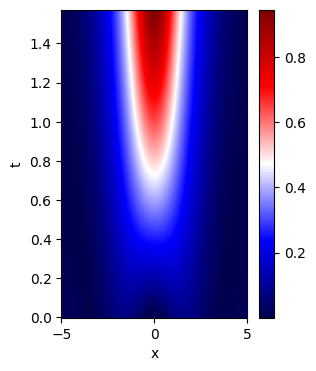

In [22]:
fig = plt.figure(figsize=(3, 4))
plt.pcolor(x_test, t_test, np.sqrt(psi_r_pred**2+psi_i_pred**2), cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()